# Project: Wrangling and Analyze Data



## Table of Contents

- [Data Gathering](#data-gathering)
- [Assessing Data](#assessing-data)
    - [Visual Assessment](#visual-assessment)
    - [Programmatic Assessment](#programmatic-assessment)
- [Cleaning Data](#cleaning-data)
- [Storing Data](#storing-data)
- [Analyzing and Visualizing Data](#analyzing-visualizing-data)

## Data Gathering
<a id="data-gathering"></a>

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import requests
import os.path
import json


In [2]:
twitr_arch_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# I check if the file exists. If No, download it else just read it
if not os.path.exists('image-predictions.tsv'):
    response = requests.get(url)
    with open('image-predictions.tsv', 'wb') as f:
        f.write(response.content)
else:
    # read in the image predictions data
    image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [4]:

# helper function to extract the needed columns
# from the json data
def extract(data):
    values = {
        "id": data["id"],
        "retweet_count": data["retweet_count"],
        "favorite_count": data["favorite_count"]
    }
    return values


with open('tweet_json.txt', 'r') as tweets:
    data = [extract(json.loads(tweet.strip())) for tweet in tweets]

tweet_df = pd.DataFrame(data, columns = ["id", "retweet_count", "favorite_count"])

## Assessing Data
<a id="assessing-data"></a>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

### Visual Assessment
<a id="visual-assessment"></a>

In [5]:
# visualizing the twitter archive
twitr_arch_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
tweet_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [7]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Programmatic Assessment
<a id="programmatic-assessment"></a>

In [8]:
# view the no. of columns/records and data types of twitter archive
twitr_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Observations** from the above info.

1. The info above showed that there are 181 retweets. 
2. The timestamp column is an object (string) instead of a datetime.
3. `in_reply_to_status_id` and `in_reply_to_user_id` mostly contain null values.

<br>
Let's view the id and text of the first 10 rows of retweets.

In [9]:
# view retweets 
twitr_arch_df[~twitr_arch_df.retweeted_status_id.isnull()][['tweet_id', 'text']].head(10)

,tweet_id,text
19,888202515573088257,RT @dog_rates: This is Canela. She attempted s...
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
36,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...
68,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...
73,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...
74,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...
78,877611172832227328,RT @rachel2195: @dog_rates the boyfriend and h...
91,874434818259525634,RT @dog_rates: This is Coco. At first I though...
95,873697596434513921,RT @dog_rates: This is Walter. He won't start ...
97,873337748698140672,RT @dog_rates: This is Sierra. She's one preci...


Not all ratings are dog ratings. From my observation (visual assessment with Excel), *please* and *stop* were common words in those rows. Let us inspect programmatically.

In [10]:
print(twitr_arch_df[twitr_arch_df.text.str.contains('stop')][['tweet_id', 'text']].shape)

has_stops = twitr_arch_df[twitr_arch_df.text.str.contains('stop')][['tweet_id', 'text']]
has_stops

(48, 2)


,tweet_id,text
4,891327558926688256,This is Franklin. He would like you to stop ca...
89,875021211251597312,Guys please stop sending pictures without any ...
221,849776966551130114,Seriously guys? Again? We only rate dogs. Plea...
226,848690551926992896,Please stop sending in animals other than dogs...
238,847116187444137987,Unbelievable... We. Only. Rate. Dogs. Please s...
372,828381636999917570,Meet Doobert. He's a deaf doggo. Didn't stop h...
378,827933404142436356,This is Kona. Yesterday she stopped by the dep...
416,822610361945911296,Please stop sending in non-canines like this V...
497,813142292504645637,Everybody stop what you're doing and look at t...
542,806219024703037440,We only rate dogs. Please stop sending in non-...


In [11]:
# some text containing 'stop' are actual tweets - They start with "This is", "Meet", "Everybody stop"
has_stops[has_stops.text.str.startswith("This is")]

,tweet_id,text
4,891327558926688256,This is Franklin. He would like you to stop ca...
378,827933404142436356,This is Kona. Yesterday she stopped by the dep...
635,793601777308463104,This is Dobby. I can't stop looking at her fee...
783,775350846108426240,This is Maximus. A little rain won't stop him....
813,771102124360998913,This is Charlie. He works for @TODAYshow. Supe...
859,763183847194451968,This is Clark. He collects teddy bears. It's a...
1105,734912297295085568,This is Jax. He's a literal fluffball. Sneaky ...
1214,715200624753819648,This is Michelangelope. He's half coffee cup. ...
1378,701570477911896070,This is Yoda. He's a Zimbabwean Rutabaga. Frea...
1419,698342080612007937,This is Maximus. He's training for the tetherb...


In [12]:
has_stops[has_stops.text.str.startswith("Meet")]

,tweet_id,text
372,828381636999917570,Meet Doobert. He's a deaf doggo. Didn't stop h...
1672,682389078323662849,Meet Brody. He's a Downton Abbey Falsetto. Add...
1899,674670581682434048,Meet Jeb &amp; Bush. Jeb is somehow stuck in t...


In [13]:
has_stops[has_stops.text.str.startswith("Everybody stop")]

,tweet_id,text
497,813142292504645637,Everybody stop what you're doing and look at t...
1093,737310737551491075,Everybody stop what you're doing and watch the...
1293,708026248782585858,Everybody stop what you're doing and watch thi...


Some tweets containing stop are also canine tweets. I manually selected them.

In [14]:
selected_from_stops = [701805642395348998, 686007916130873345, 668587383441514497]

has_stops.query("tweet_id in @selected_from_stops")

,tweet_id,text
1376,701805642395348998,Please pray for this pupper. Nothing wrong wit...
1600,686007916130873345,This pupper has a magical eye. 11/10 I can't s...
2212,668587383441514497,Never forget this vine. You will not stop watc...


**Storing the tweets IDS for reference**

In [15]:
# Removing actual canine tweets from "has_stops"
has_stops = has_stops[~has_stops.text.str.startswith("This is")]
has_stops = has_stops[~has_stops.text.str.startswith("Meet")]
has_stops = has_stops[~has_stops.text.str.startswith("Everybody stop")]

In [16]:
# drop the manually selected ones
has_stops = has_stops.drop(has_stops.query("tweet_id in @selected_from_stops").index)
has_stops

,tweet_id,text
89,875021211251597312,Guys please stop sending pictures without any ...
221,849776966551130114,Seriously guys? Again? We only rate dogs. Plea...
226,848690551926992896,Please stop sending in animals other than dogs...
238,847116187444137987,Unbelievable... We. Only. Rate. Dogs. Please s...
416,822610361945911296,Please stop sending in non-canines like this V...
542,806219024703037440,We only rate dogs. Please stop sending in non-...
730,781661882474196992,Who keeps sending in pictures without dogs in ...
744,780192070812196864,We only rate dogs. Pls stop sending in non-can...
773,776249906839351296,RT @dog_rates: We only rate dogs. Pls stop sen...
819,770655142660169732,We only rate dogs. Pls stop sending in non-can...


In [17]:
# save the non-canine tweet ids
non_canine_tweet_ids = has_stops.tweet_id

**Dog name inspection**

In [18]:
# Exploring the dog names further
sorted(twitr_arch_df.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [19]:
# checking for typos in dog names. Phew! This was a lot of work :)
twitr_arch_df[twitr_arch_df.name.str.contains('Ziva')][['text', 'name']]

,text,name
1124,This is Ziva. She doesn't know how her collar ...,Ziva


There are improper dog names - `O, an, my, unacceptable etc.` They are all in lower cases.

There's a dog whose name is just `O`. I'll investigate further :)

`Shawwn` seems to be a mispelled dog name. 

In [20]:
# retrieve the improper dog names
improper_dog_names = list(filter(lambda name: name.islower(), twitr_arch_df.name.unique()))

# use print to "spread" the results instead of the default display (which is a long line)
# improper_dog_names
print(improper_dog_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [21]:
# view rows with improper dog names
twitr_arch_df.query("name in @improper_dog_names")[["name", "text"]]

,name,text
22,such,I've yet to rate a Venezuelan Hover Wiener. Th...
56,a,Here is a pupper approaching maximum borkdrive...
118,quite,RT @dog_rates: We only rate dogs. This is quit...
169,quite,We only rate dogs. This is quite clearly a smo...
193,quite,"Guys, we only rate dogs. This is quite clearly..."
335,not,There's going to be a dog terminal at JFK Airp...
369,one,"Occasionally, we're sent fantastic stories. Th..."
542,incredibly,We only rate dogs. Please stop sending in non-...
649,a,Here is a perfect example of someone who has t...
682,mad,RT @dog_rates: Say hello to mad pupper. You kn...


In [22]:
# Can we drop rows with "improper dog names"?
twitr_arch_df.query("name in @improper_dog_names")[["name", "text"]].shape

(109, 2)

Since there are 109 rows (some are retweets), we can either drop the rows or replace the values with None.

In [23]:
# Let's check the dog 'O'
twitr_arch_df[twitr_arch_df.name == 'O'][['tweet_id', 'name', 'text']]

,tweet_id,name,text
775,776201521193218049,O,This is O'Malley. That is how he sleeps. Doesn...


Oh! The actual name is **O'Malley**.

In [24]:
# check for names that starts with 'Lil'
twitr_arch_df[['text', 'name', 'tweet_id']][twitr_arch_df.name.str.startswith('Lil')]

,text,name,tweet_id
36,RT @dog_rates: This is Lilly. She just paralle...,Lilly,885311592912609280
134,This is Lili. She can't believe you betrayed h...,Lili,866686824827068416
356,This is Lilly. She just parallel barked. Kindl...,Lilly,830583320585068544
643,Say hello to Lily. She's pupset that her costu...,Lily,793195938047070209
898,This is Lilli Bee &amp; Honey Bear. Unfortunat...,Lilli,758854675097526272
971,Meet Lilah. She agreed on one quick pic. Now s...,Lilah,750101899009982464
1092,Say hello to Lily. She's not injured or anythi...,Lily,737322739594330112
1152,Say hello to Lillie. She's a Rutabagan Floofem...,Lillie,725786712245440512
1422,This is Lily. She accidentally dropped all her...,Lily,698178924120031232


In [25]:
# check for duplicates
twitr_arch_df.tweet_id.duplicated().sum()

0

There no duplicates.

In [26]:
# carry out descriptive statistics
twitr_arch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Why does the max rating numerator and denominator so high? Let's investigate.

In [27]:
# View ratings that are higher than 30 (a number chosen after exploration)
twitr_arch_df[twitr_arch_df.rating_numerator > 30][['tweet_id', "rating_numerator", "rating_denominator", "text"]]

,tweet_id,rating_numerator,rating_denominator,text
188,855862651834028034,420,10,@dhmontgomery We also gave snoop dogg a 420/10...
189,855860136149123072,666,10,@s8n You tried very hard to portray this good ...
290,838150277551247360,182,10,@markhoppus 182/10
313,835246439529840640,960,0,@jonnysun @Lin_Manuel ok jomny I know you're e...
340,832215909146226688,75,10,"RT @dog_rates: This is Logan, the Chow who liv..."
433,820690176645140481,84,70,The floofs have been released I repeat the flo...
695,786709082849828864,75,10,"This is Logan, the Chow who lived. He solemnly..."
902,758467244762497024,165,150,Why does this never happen at my front door......
979,749981277374128128,1776,10,This is Atticus. He's quite simply America af....
1120,731156023742988288,204,170,Say hello to this unbelievably well behaved sq...


In [28]:
# which rows or columns have 0 rating in either the numerator or denominator

# rating_0 = twitr_arch_df.rating_numerator == 0 or twitr_arch_df.rating_denominator == 0

twitr_arch_df.query("rating_numerator == 0 or rating_denominator == 0")[['tweet_id', "rating_numerator", "rating_denominator", "text"]]

,tweet_id,rating_numerator,rating_denominator,text
313,835246439529840640,960,0,@jonnysun @Lin_Manuel ok jomny I know you're e...
315,835152434251116546,0,10,When you're so blinded by your systematic plag...
1016,746906459439529985,0,10,"PUPDATE: can't see any. Even if I could, I cou..."


In [29]:
# rows where rating numerator is less than denominator
twitr_arch_df.query("rating_numerator < rating_denominator")[["rating_numerator", "rating_denominator", "name"]]

,rating_numerator,rating_denominator,name
45,5,10,Bella
229,6,10,Jerry
315,0,10,None
342,11,15,None
387,7,10,None
462,7,10,Herschel
485,9,10,Beau
599,8,10,None
605,1,10,None
730,5,10,None


In [31]:
# view the no. of columns/records and data types of image predictions
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
# view the no. of columns/records and data types of retweet and favorite counts
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [33]:
# descriptive statistics of tweet_df
tweet_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [34]:
twitr_arch_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality issues
1. 181 rows contain retweets.

2. Some tweets are not about dogs.

3. `in_reply_to_status_id` and `in_reply_to_user_id` mostly contain null values.

4. The timestamp column is an object (string).

5. There are improper dog names.

6. Dog name at tweet with tweet_id `776201521193218049` is O instead of O'Malley.

7. Mispelled name `Shawwn`.

8. Rating numerator and Rating denominator is zero in some rows.

### Tidiness issues

1. Dog stages (puppo, pupper, doggo and floofer) are spread across 4 columns instead of a single column.

2. All datasets should be in a single table.

## Cleaning Data
<a id="cleaning-data"></a>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [35]:
# Make copies of original pieces of data
twitr_arch_df_copy = twitr_arch_df.copy()
image_predictions_df_copy = image_predictions_df.copy()
tweet_df_copy = tweet_df.copy()

### Issue #1: 181 rows contain retweets

#### Define: remove the rows containing retweets and drop the columns `retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp`.

#### Code

In [36]:
# filter and collect only rows where retweeted_status_id is null
twitr_arch_df_copy = twitr_arch_df_copy[twitr_arch_df_copy.retweeted_status_id.isnull()]

twitr_arch_df_copy.drop(['retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [37]:
# 181 rows dropped
twitr_arch_df.shape[0] - twitr_arch_df_copy.shape[0]

181

### Issue #2: Some tweets are not about dogs

#### Define: remove the rows containing non-canine tweets.

Earlier, I stored the tweet ids in a variable `non_canine_tweet_ids`.

#### Code

In [38]:
# convert to list
non_canine_tweets = list(non_canine_tweet_ids)

# drop the non-canine tweets
twitr_arch_df_copy = twitr_arch_df_copy.drop(twitr_arch_df_copy.query("tweet_id in @non_canine_tweets").index)

#### Test

In [39]:
# non-canine tweets removed
twitr_arch_df_copy.query("tweet_id in @non_canine_tweets").shape

(0, 14)

### Issue #3: `in_reply_to_status_id` and `in_reply_to_user_id` mostly contain null values.

#### Define: Drop both columns

#### Code

In [40]:
# drop both columns
twitr_arch_df_copy = twitr_arch_df_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [41]:
# no more retweets
twitr_arch_df_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #4: The timestamp column is an object (string).

#### Define: Convert the timestamp column to datetime type.

This could be useful for tracking tweet counts over time or which period had more tweets/dog ratings

#### Code

In [42]:
# use the to_datetime method in pandas to carry out the conversion
twitr_arch_df_copy.timestamp = pd.to_datetime(twitr_arch_df_copy.timestamp)

#### Test

In [43]:
# the timestamp column is now a datetime64 type
twitr_arch_df_copy.timestamp.dtypes

dtype('<M8[ns]')

### Issue #5: There are improper dog names

#### Define: Replace the improper dog names with 'None'.

#### Code

In [44]:
print(improper_dog_names)

# get the indices of the improper dog names
inds = twitr_arch_df_copy.query("name in @improper_dog_names").index

# replace the values with None
twitr_arch_df_copy.loc[inds, "name"] = np.nan

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


#### Test

In [45]:
# Now empty
twitr_arch_df_copy.query("name in @improper_dog_names").shape

(0, 12)

### Issue #6: Dog name at tweet with tweet_id `776201521193218049` is O instead of O'Malley

#### Define: Replace `O` with `O'Malley` in the name column of tweet with tweet_id `776201521193218049`.

#### Code

In [46]:
# get the index of O'Malley
ind = twitr_arch_df_copy.query("name == 'O'").index

# make correction
twitr_arch_df_copy.loc[ind, "name"] = "O'Malley"

#### Test

In [47]:
# No more O, only O'Malley
twitr_arch_df_copy.query("name == 'O'").shape, twitr_arch_df_copy[twitr_arch_df_copy.name == "O'Malley"].shape

((0, 12), (1, 12))

### Issue #7: Tweet with tweet id `669680153564442624` has a mispelled dog name `Shawwn`

#### Define: Replace `Shawwn` with `Shawn`.

#### Code

In [48]:
twitr_arch_df_copy.name = twitr_arch_df_copy.name.str.replace('Shawwn', 'Shawn')

#### Test

In [49]:
# cleaned
twitr_arch_df_copy.query("name == 'Shawwn'").shape

(0, 12)

In [50]:
twitr_arch_df_copy.query("name == 'Shawn'").shape

(1, 12)

### Issue #8: Rating numerator and Rating denominator is zero in some rows.

#### Define: Remove rows where `rating_numerator` or `rating_denominator` is 0.

#### Code

In [51]:
inds = twitr_arch_df_copy.query("rating_numerator == 0 or rating_denominator == 0").index
twitr_arch_df_copy.drop(inds, inplace=True)

#### Test

In [52]:
# cleaned
twitr_arch_df_copy.query("rating_numerator == 0 or rating_denominator == 0").shape

(0, 12)

### Tidyness Issue #1: Dog stages (puppo, pupper, doggo and floofer) are spread across 4 columns instead of a single column.

#### Define: Melt all dog stages (4 columns) in a single column `dog_stage` and delete the irrelevant columns.

#### Code

In [53]:
# The last 4 columns
value_vars = list(twitr_arch_df_copy.columns[-4:])

# The other columns
id_vars = list(twitr_arch_df_copy.columns[:-4])

val_name = 'dog_stage'

# melt/gather the dog stage columns
twitr_arch_df_copy = pd.melt(twitr_arch_df_copy, id_vars=id_vars, value_vars=value_vars, value_name=val_name)

In [54]:
# check for duplicates
twitr_arch_df_copy[["tweet_id", val_name]].duplicated().sum()

6090

In [55]:
# drop duplicates
twitr_arch_df_copy = twitr_arch_df_copy.drop_duplicates(["tweet_id", val_name])

In [56]:
twitr_arch_df_copy.shape

(2502, 10)

In [57]:
# replace all 'None' with np.nan
twitr_arch_df_copy.loc[twitr_arch_df_copy[val_name] == 'None', val_name] = np.nan

In [58]:
twitr_arch_df_copy[val_name].value_counts()

pupper     233
doggo       86
puppo       25
floofer     10
Name: dog_stage, dtype: int64

In [59]:
twitr_arch_df_copy.drop(['variable'], axis=1, inplace=True)

In [60]:
twitr_arch_df_copy.shape

(2502, 9)

#### Test

In [61]:
twitr_arch_df_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

**Note:** While duplicates that consist of `nan` and a dog stage exist, the purpose of this section is to tidy the data. Hence such duplicates will not be addressed here. 

### Tidyness Issue #2: All datasets should be in a single table (merged).

#### Define: Merge the datasets using pandas DataFrame `merge` method.

#### Code

In [62]:
merged_df = twitr_arch_df_copy.merge(image_predictions_df_copy, on='tweet_id', how='left')

merged_df = merged_df.merge(tweet_df_copy, left_on='tweet_id', right_on='id', how='left')
     
merged_df.drop('id', axis=1, inplace=True)

#### Test

In [63]:
merged_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [64]:
merged_df.shape

(2502, 22)

## Storing Data
<a id="storing-data"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
merged_df.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
<a id="analyzing-visualizing-data"></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [66]:
# summary statistics
merged_df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.502000e+03,2502.000000,2502.000000,2284.000000,2284.000000,2.284000e+03,2.284000e+03,2502.000000,2502.000000
mean,7.381420e+17,12.593125,10.432454,1.211471,0.597224,1.345009e-01,5.968380e-02,2901.288569,9029.520384
std,6.701762e+16,40.272988,6.542944,0.573491,0.271438,1.016087e-01,5.082648e-02,5109.024073,12706.959998
min,6.660209e+17,1.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,52.000000
25%,6.782612e+17,10.000000,10.000000,1.000000,0.367945,5.295590e-02,1.603040e-02,636.250000,2072.500000
50%,7.119681e+17,11.000000,10.000000,1.000000,0.596629,1.163795e-01,4.883445e-02,1399.500000,4191.500000
75%,7.903225e+17,12.000000,10.000000,1.000000,0.846718,1.954050e-01,9.107453e-02,3261.000000,11307.250000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [67]:
# extract day and month from timestamp
merged_df['month'] = merged_df.timestamp.dt.month
merged_df['day'] = merged_df.timestamp.dt.day_name()

rating_numerator = merged_df.rating_numerator
rating_denominator = merged_df.rating_denominator

# compute rating
merged_df['rating'] = rating_numerator / rating_denominator

merged_df.groupby('month').rating.agg(['sum', 'mean', 'median', np.std])

,sum,mean,median,std
month,,,,
1,352.886364,1.079163,1.1,0.207420
2,253.933333,1.094540,1.1,0.195153
3,249.400000,1.193301,1.2,1.195727
4,247.800000,1.982400,1.1,6.880197
5,143.000000,1.172131,1.2,0.146734
6,191.018182,1.130285,1.2,0.172247
7,389.600000,2.117391,1.2,13.008527
8,78.800000,1.109859,1.1,0.158705
9,98.900000,1.177381,1.1,0.274784


In [68]:
merged_df.groupby('month').favorite_count.mean().sort_values()

month
11     3703.818182
12     5110.214971
1      8591.801223
2      8898.241379
3      9193.511962
8     10396.971831
9     11430.500000
4     11694.032000
10    13524.619048
7     15080.635870
5     15935.918033
6     16175.544379
Name: favorite_count, dtype: float64

### Insights:

Considering the timestamp of tweets, the following can be deduced:

1. Most of the dog ratings were done on Mondays (shown in the plot below).

2. Looking at the median rating by days, day of the week has no influence on rating.

3. Tweets made in June had the most favorite count.

Also,

4. The average rating (numerator) was 12.59 although the column contained an outlier (1776).

### Visualization

In [69]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

merged_df.day.value_counts().plot();

plt.xlabel('Week day')
plt.ylabel('Count');
plt.title('Frequency of Days');

Monday was the most frequent day.

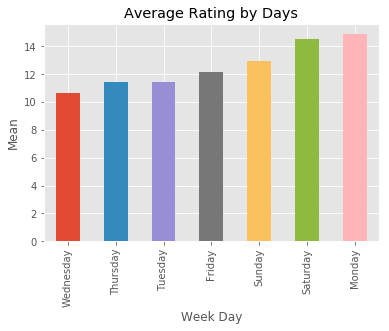

In [70]:
merged_df.groupby('day').rating_numerator.mean().sort_values().plot(kind='bar');

plt.xlabel('Week Day')
plt.ylabel('Mean');
plt.title('Average Rating by Days');

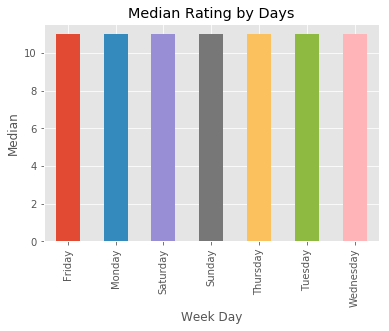

In [71]:
merged_df.groupby('day').rating_numerator.median().sort_values().plot(kind='bar');

plt.xlabel('Week Day')
plt.ylabel('Median');
plt.title('Median Rating by Days');